In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data_dir = "../data"

customers = pd.read_csv(data_dir + '/customers.csv')

In [ ]:
print(customers.describe())

In [40]:
print(customers.head())

                                         customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  0.0     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  0.0     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  0.0     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  0.0     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b

In [5]:
print(customers.isnull().sum())

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64


In [38]:
max_values = customers.max(numeric_only=True)
print(max_values)

FN         1.0
Active     1.0
age       99.0
dtype: float64


In [39]:
min_values = customers.min(numeric_only=True)
print(min_values)

FN         0.0
Active     1.0
age       16.0
dtype: float64


In [11]:
percentage_neg_one = (customers.isnull().sum()) / len(customers) * 100
print(percentage_neg_one)

customer_id                0.000000
FN                        65.237831
Active                    66.150819
club_member_status         0.441843
fashion_news_frequency     1.166854
age                        1.156066
postal_code                0.000000
dtype: float64


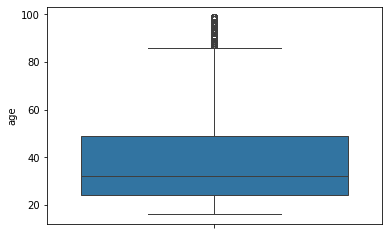

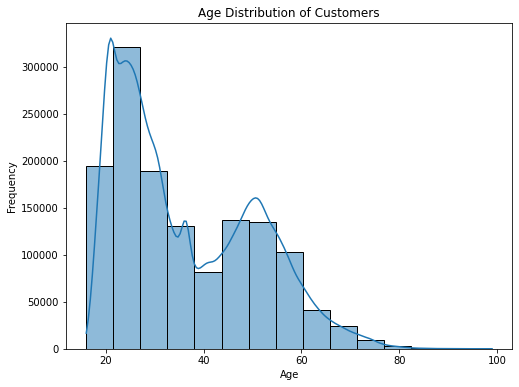

Missing Values Count in 'age': 0
There are 264 people above the age of 80. That is about 0.019242263006749367%


In [30]:
###AGE###
sns.boxplot(data = customers['age'])

# Histogram for 'age'
plt.figure(figsize=(8, 6))
sns.histplot(customers['age'], bins=15, kde=True)  # kde is Kernel Density Estimation
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Calculating the mean age
mean_age = customers['age'].mean()

# Replacing NaN values in 'age' column with the mean age
customers['age'].fillna(mean_age, inplace=True)

# Verifying
print("Missing Values Count in 'age':", customers['age'].isna().sum())

# Check how many people are above age 80
above_80 = customers[customers['age'] > 85]

# Get the count of people above age 80
count_above_80 = len(above_80)

print(f"There are {count_above_80} people above the age of 80. That is about {count_above_80/len(customers) * 100}%")

Count of 1's: 476930
Count of 0's: 895050
Count of Missing Values: 0


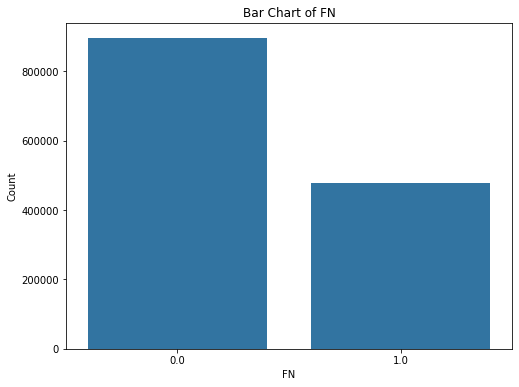

Updated Counts:
0.0    895050
1.0    476930
Name: FN, dtype: int64
Missing Values Count: 0


In [28]:
###FN###
# Count of 1's and 0's
fn_counts = customers['FN'].value_counts()

# Count of missing values
missing_values_count = customers['FN'].isna().sum()

# Display the counts
print(f"Count of 1's: {fn_counts.get(1, 0)}")
print(f"Count of 0's: {fn_counts.get(0, 0)}")
print(f"Count of Missing Values: {missing_values_count}")

# Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='FN', data=customers)
plt.title('Bar Chart of FN')
plt.xlabel('FN')
plt.ylabel('Count')
plt.show()

customers['FN'].fillna(0, inplace=True)
# Count of missing values
missing_values_count = customers['FN'].isna().sum()

# Display the counts
# Verifying
print("Updated Counts:")
print(customers['FN'].value_counts())
print("Missing Values Count:", customers['FN'].isna().sum())

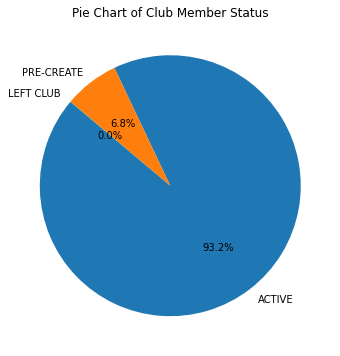

6062


In [31]:
# Pie Chart
plt.figure(figsize=(8, 6))
customers['club_member_status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Club Member Status')
plt.ylabel('')
plt.show()

missing_values = customers['club_member_status'].isna().sum()
print(missing_values)

Active Distribution:
1.0    100.0
Name: Active, dtype: float64


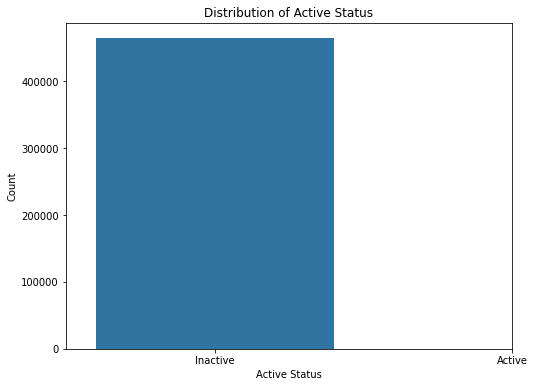

<AxesSubplot:>

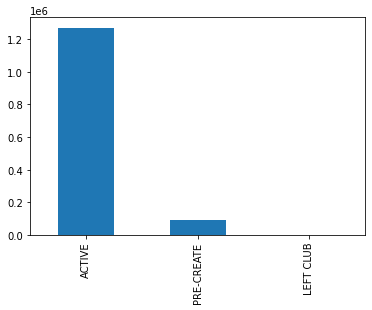

In [24]:
# Check the distribution
active_distribution = customers['Active'].value_counts(normalize=True) * 100

print("Active Distribution:")
print(active_distribution)

# Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Active', data=customers)
plt.title('Distribution of Active Status')
plt.xlabel('Active Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])  # If 0 is inactive and 1 is active
plt.show()


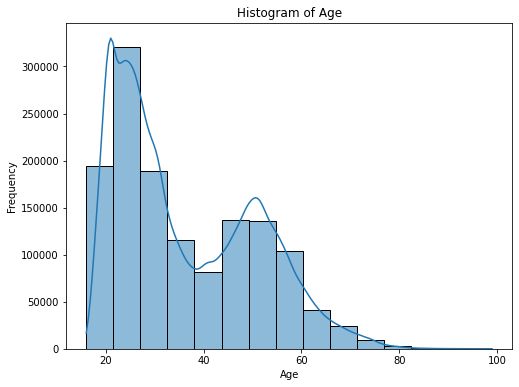

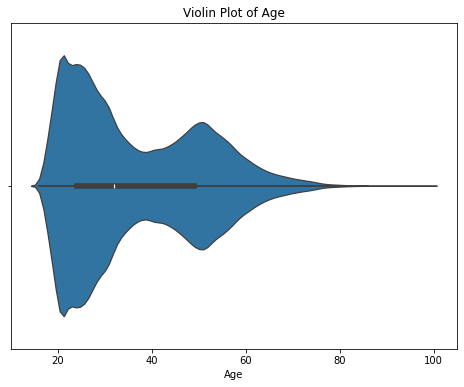

In [16]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(customers['age'], bins=15, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=customers['age'])
plt.title('Violin Plot of Age')
plt.xlabel('Age')
plt.show()

In [ ]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(customers['age'], bins=15, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x=customers['age'])
plt.title('Violin Plot of Age')
plt.xlabel('Age')
plt.show()

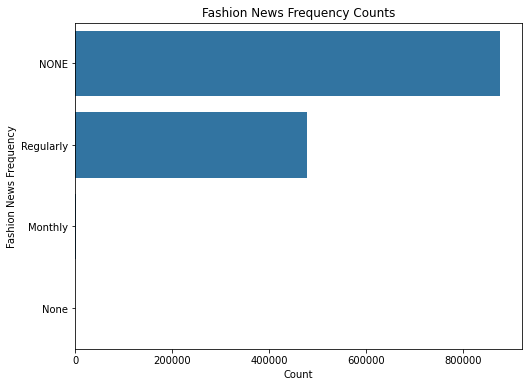

In [32]:
# Bar Chart
print()
plt.figure(figsize=(8, 6))
sns.countplot(y='fashion_news_frequency', data=customers, order = customers['fashion_news_frequency'].value_counts().index)
plt.title('Fashion News Frequency Counts')
plt.xlabel('Count')
plt.ylabel('Fashion News Frequency')
plt.show()

In [37]:
# Checking distinct values and their distribution
frequency_dist = customers['fashion_news_frequency'].value_counts(dropna=False)
unique_values = customers['fashion_news_frequency'].nunique(dropna=False)

# Display the results
print(f"There are {unique_values} distinct values in the 'fashion_news_frequency' column:")
print(frequency_dist)

There are 5 distinct values in the 'fashion_news_frequency' column:
NONE         877711
Regularly    477416
NaN           16009
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64
